In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

resnet_model = ResNet50(weights='imagenet')

Using TensorFlow backend.
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Siyam\Anaconda3\envs\te

In [2]:
from keras.preprocessing import image

img_path = 'images/dog.jpg'

img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

preds = resnet_model.predict(x)

print('Predicted:',decode_predictions(preds,top=3)[0])

Predicted: [('n02100583', 'vizsla', 0.5060593), ('n02092339', 'Weimaraner', 0.30192485), ('n02099849', 'Chesapeake_Bay_retriever', 0.11213297)]


In [18]:
import cv2
from os import listdir
from os.path import isfile, join

# Our openCV function that displays the image and it's predicted labels 
def draw_test(name, preditions, input_im):
    """Function displays the output of the prediction alongside the orignal image"""
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 100, 0, imageL.shape[1]+3000 ,cv2.BORDER_CONSTANT,value=BLACK)
    img_width = input_im.shape[1]
    for (i,predition) in enumerate(preditions):
        string = str(predition[1]) + " " + str(predition[2])
        cv2.putText(expanded_image,str(name),(img_width + 50,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,0,255),1)
        cv2.putText(expanded_image,string,(img_width + 50,50+((i+1)*50)),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),1)
    cv2.imshow(name, expanded_image)


In [19]:

# Get images located in ./images folder    
mypath = "images/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Loop through images run them through our classifer
from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
for file in file_names:

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = resnet_model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    draw_test("Predictions", preditions, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [20]:
imageL.shape

(600, 800, 3)

In [1]:
img = image.load_img(img_path, target_size=(224, 224))

Using TensorFlow backend.
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Siyam\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Siyam\Anaconda3\envs\te

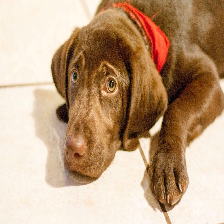

In [2]:
img

In [3]:
x = image.img_to_array(img)
x

array([[[254., 241., 225.],
        [252., 239., 223.],
        [255., 242., 226.],
        ...,
        [116.,  78.,  39.],
        [147., 104.,  61.],
        [137.,  93.,  54.]],

       [[251., 239., 223.],
        [251., 239., 223.],
        [252., 239., 223.],
        ...,
        [118.,  80.,  41.],
        [118.,  75.,  30.],
        [120.,  78.,  30.]],

       [[249., 240., 223.],
        [250., 241., 224.],
        [253., 240., 224.],
        ...,
        [119.,  81.,  42.],
        [127.,  84.,  42.],
        [125.,  83.,  35.]],

       ...,

       [[247., 239., 226.],
        [247., 239., 226.],
        [248., 240., 227.],
        ...,
        [254., 245., 240.],
        [250., 248., 236.],
        [252., 245., 235.]],

       [[248., 241., 225.],
        [248., 241., 225.],
        [248., 240., 227.],
        ...,
        [255., 242., 232.],
        [247., 223., 199.],
        [244., 218., 195.]],

       [[248., 241., 223.],
        [247., 240., 222.],
        [246., 2

In [5]:
import numpy as np
x = np.expand_dims(x, axis=0) #(1000,255,255,255,3) 1000=num of images
x

array([[[[254., 241., 225.],
         [252., 239., 223.],
         [255., 242., 226.],
         ...,
         [116.,  78.,  39.],
         [147., 104.,  61.],
         [137.,  93.,  54.]],

        [[251., 239., 223.],
         [251., 239., 223.],
         [252., 239., 223.],
         ...,
         [118.,  80.,  41.],
         [118.,  75.,  30.],
         [120.,  78.,  30.]],

        [[249., 240., 223.],
         [250., 241., 224.],
         [253., 240., 224.],
         ...,
         [119.,  81.,  42.],
         [127.,  84.,  42.],
         [125.,  83.,  35.]],

        ...,

        [[247., 239., 226.],
         [247., 239., 226.],
         [248., 240., 227.],
         ...,
         [254., 245., 240.],
         [250., 248., 236.],
         [252., 245., 235.]],

        [[248., 241., 225.],
         [248., 241., 225.],
         [248., 240., 227.],
         ...,
         [255., 242., 232.],
         [247., 223., 199.],
         [244., 218., 195.]],

        [[248., 241., 223.],
       

In [7]:
from keras.applications.resnet50 import preprocess_input
x = preprocess_input(x)
x

array([[[[121.061    , 124.221    , 130.32     ],
         [119.061    , 122.221    , 128.32     ],
         [122.061    , 125.221    , 131.32     ],
         ...,
         [-64.939    , -38.779    ,  -7.6800003],
         [-42.939003 , -12.778999 ,  23.32     ],
         [-49.939003 , -23.779    ,  13.32     ]],

        [[119.061    , 122.221    , 127.32     ],
         [119.061    , 122.221    , 127.32     ],
         [119.061    , 122.221    , 128.32     ],
         ...,
         [-62.939003 , -36.779    ,  -5.6800003],
         [-73.939    , -41.779    ,  -5.6800003],
         [-73.939    , -38.779    ,  -3.6800003]],

        [[119.061    , 123.221    , 125.32     ],
         [120.061    , 124.221    , 126.32     ],
         [120.061    , 123.221    , 129.32     ],
         ...,
         [-61.939003 , -35.779    ,  -4.6800003],
         [-61.939003 , -32.779    ,   3.3199997],
         [-68.939    , -33.779    ,   1.3199997]],

        ...,

        [[122.061    , 122.221    , 12

In [ ]:
preds = resnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [10]:
from os import listdir
from os.path import isfile, join
mypath = "images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(file_names)

['bikinimodel.jpg', 'dog.jpg', 'snail.jpg']


In [11]:
f for f in listdir(mypath) if isfile(join(mypath, f))

SyntaxError: invalid syntax (<ipython-input-11-dae95b8a7614>, line 1)

In [ ]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50
 
#Loads the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')
 
# Loads the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
# Loads the ResNet50 model 
# uncomment the line below if you didn't load resnet50 beforehand
#resnet_model = resnet50.ResNet50(weights='imagenet')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
    73728/553467096 [..............................] - ETA: 195:34:31